In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
df = pd.read_csv('loan_preprocessed1.csv')

In [19]:
df.shape

(395219, 81)

In [17]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = Sequential()

model.add(Dense(81, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [21]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2976 - val_loss: 0.2678
Epoch 2/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2656 - val_loss: 0.2631
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2629 - val_loss: 0.2621
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2618 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2609 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2605 - val_loss: 0.2618
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2600 - val_loss: 0.2620
Epoch 8/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2596 - val_loss: 0.2616
Epoch 9/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2592 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.258

In [22]:
model.save('loan_model.h5')

In [23]:
losses = pd.DataFrame(model.history.history)

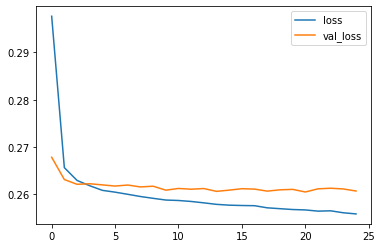

In [24]:
losses.plot()

In [26]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [28]:
print(confusion_matrix(y_test, predictions))

[[ 6949  8709]
 [  198 63188]]
